### Example Notebook for Nearest Neighbor Calculations
####   Daniel Trugman, 2024

In [1]:
#### Package Imports ####

# packages
using DataFrames
using CSV
using Printf
using StatSei


load_catalog_nvreloc (generic function with 1 method)

In [2]:
###### Script Setup #######

# run parameters (Zaliapin and Ben-Zion 2013)
bval = 1.0 # fixed here
dfrac = 1.6 # fixed here for 2D distances

# minimum magnitude to use for this analysis
minmag = 2.5

# nearest neighbor threshold separating modes
thresh = -5.0

# parameters for family assignment
max_dY = 20.0 # maximum year difference for parent search (set for efficiency) 
                    # 20.0 is likely conservative, 10.0 may be fine?
max_dL = 999.0 # scale factor to multiply parent rupture dimension when checking
                    # family assignment distance window [set to large value to turn off]
max_dT = 0.0  # scale factor to multiply parent magnitude when checking 
                    # family assignment time window [ok to keep at 0.0]

0.0

In [3]:
### Load Catalog HS 2011 catalog (used in ZBZ13 paper)

qdf = load_catalog_hs2011("../data/hs_1981_2011_06_comb_K2_A.cat_so_scsn_v01.gz",minmag)

Duplicates removed, keeping: 39724/39741


Row,evid,otime,tepoch,lat,lon,dep,mag,enum
,Int64,DateTime,Float64,Float64,Float64,Float64,Float64,Int64
1,3301609,1981-01-02T15:03:09.120,3.47296e8,36.0457,-118.275,11.62,3.13,1
2,3301616,1981-01-02T16:45:32.750,3.47302e8,36.0422,-118.276,0.03,2.59,2
3,3301639,1981-01-04T09:21:32.270,3.47448e8,32.1482,-115.782,21.19,2.77,3
4,3301757,1981-01-08T14:52:14.490,3.47814e8,33.9298,-118.681,8.59,3.2,4
5,3301824,1981-01-10T23:19:20.480,3.48017e8,36.2263,-120.175,9.31,2.81,5
6,12160219,1981-01-11T02:23:37.280,3.48028e8,36.1398,-120.058,18.84,2.98,6
7,3301833,1981-01-11T02:27:42.660,3.48028e8,36.2473,-120.152,7.26,2.62,7
8,3301835,1981-01-11T04:44:29.600,3.48036e8,36.0263,-120.713,4.87,3.49,8
9,3301836,1981-01-11T05:09:20.300,3.48038e8,37.3023,-118.853,5.6,2.53,9


In [4]:
### Perform Nearest Neighbor Calculation

println("\n\nFinding neighbors, please wait.")
@time ndf = find_neighbors_llt(qdf.lon,qdf.lat,qdf.tepoch,qdf.mag,bval,dfrac,max_dY)



Finding neighbors, please wait.
Completed    10000    39724
Completed    20000    39724
Completed    30000    39724
 61.427797 seconds (127.15 k allocations: 5.186 GiB, 0.53% gc time, 0.14% compilation time)


Row,enum,pid,l10KM,l10DAY,distR,distT,distN
,Int64,Int64,Float64,Float64,Float64,Float64,Float64
1,1,0,0.0,0.0,0.0,0.0,0.0
2,2,1,-0.393765,-1.14809,-2.19502,-5.27538,-7.47041
3,3,1,2.69054,0.246195,2.73986,-3.8811,-1.14124
4,4,1,2.37691,0.777602,2.23806,-3.34969,-1.11163
5,5,4,2.46136,0.371466,2.33818,-3.79083,-1.45265
6,6,5,1.15393,-0.892884,0.441284,-4.86018,-4.41889
7,7,6,1.16589,-2.54667,0.375423,-6.59897,-6.22354
8,8,6,1.77953,-1.00954,1.35724,-5.06183,-3.70459
9,9,8,2.33893,-1.76312,1.99729,-6.07042,-4.07313


In [5]:
### Now assign families

# make family assignments
println("\nAssigned families:")
@time fdf = assign_families(ndf.distN,ndf.pid,
    ndf.l10KM,ndf.l10DAY,qdf.mag,thresh,max_dL,max_dT)
ndf = innerjoin(ndf,fdf,on=:enum)
show(ndf)

# print some stats
@printf("\nTotal families: %d\n",maximum(ndf.fid))
@printf("Largest family: %d\n",maximum(ndf.nb))
@printf("NaN vals: %d\n",sum(isnan.(ndf.distN)))
@printf("Inf vals: %d\n",sum(isinf.(ndf.distN)))


Assigned families:
Family assignments prevented by RT criteria: 0
  1.240753 seconds (1.76 M allocations: 122.341 MiB, 1.01% gc time, 99.02% compilation time: 28% of which was recompilation)
39724×10 DataFrame
   Row │ enum   pid    l10KM      l10DAY      distR      distT      distN      ⋯
       │ Int64  Int64  Float64    Float64     Float64    Float64    Float64    ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1      0   0.0        0.0         0.0        0.0        0.0       ⋯
     2 │     2      1  -0.393765  -1.14809    -2.19502   -5.27538   -7.47041
     3 │     3      1   2.69054    0.246195    2.73986   -3.8811    -1.14124
     4 │     4      1   2.37691    0.777602    2.23806   -3.34969   -1.11163
     5 │     5      4   2.46136    0.371466    2.33818   -3.79083   -1.45265   ⋯
     6 │     6      5   1.15393   -0.892884    0.441284  -4.86018   -4.41889
     7 │     7      6   1.16589   -2.54667     0.375423  -6.59897   -6.22354


Plotting results:

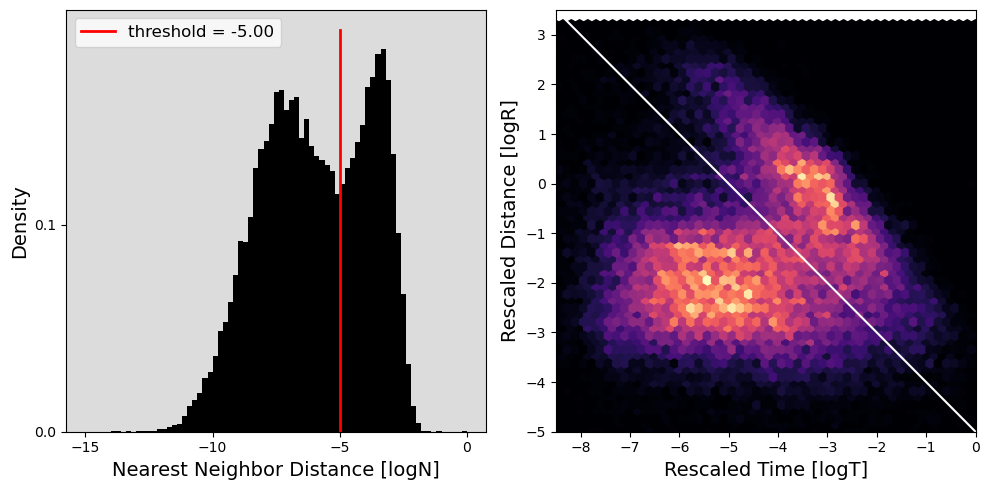

In [6]:
### Plot Results for this threshold
print("\nPlotting results:")
fig = plot_neighbors(ndf.distR,ndf.distT,ndf.distN,thresh);

In [7]:
### Output catalog

# compile output dataframe
odf = leftjoin(qdf[!,[:enum,:evid,:otime,:mag,:lon,:lat,:dep]],
    ndf[!,[:enum,:pid,:distR,:distT,:fid,:nb]],on=:enum)
show(odf)

# write out
fout = "neighbors.csv"
println("\nOutput file: ",fout)
CSV.write(fout, odf);


39724×12 DataFrame
   Row │ enum   evid      otime                    mag      lon       lat      ⋯
       │ Int64  Int64     DateTime                 Float64  Float64   Float64  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │     1   3301609  1981-01-02T15:03:09.120     3.13  -118.275  36.0457  ⋯
     2 │     2   3301616  1981-01-02T16:45:32.750     2.59  -118.276  36.0422
     3 │     3   3301639  1981-01-04T09:21:32.270     2.77  -115.782  32.1482
     4 │     4   3301757  1981-01-08T14:52:14.490     3.2   -118.681  33.9298
     5 │     5   3301824  1981-01-10T23:19:20.480     2.81  -120.175  36.2263  ⋯
     6 │     6  12160219  1981-01-11T02:23:37.280     2.98  -120.058  36.1398
     7 │     7   3301833  1981-01-11T02:27:42.660     2.62  -120.152  36.2473
     8 │     8   3301835  1981-01-11T04:44:29.600     3.49  -120.713  36.0263
     9 │     9   3301836  1981-01-11T05:09:20.300     2.53  -118.853  37.3023  ⋯
    10 │    10   3301864  1